[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tselane2110/Applied-Computer-Vision/blob/main/assignment-1/Assignment-1.ipynb)

# Importing the Libraries

In [29]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## 1. Adding noise to the Dog image:

In [33]:
def show_image(img, title="Image"):
    """
    Displays the input image
    """
    plt.figure(figsize=(5, 5))

    if img.ndim == 2:  # grayscale
        plt.imshow(img, cmap="gray", vmin=0, vmax=255)
    else:  # RGB
        plt.imshow(img)

    plt.title(title)
    plt.axis("off")
    plt.show()


In [42]:
# function to add gaussian noise in an image

def add_gaussian_noise(img, mean, std):

  # show image
  title = "Image before adding the gaussian noise"
  show_image(img, title)

  # getting the shape of the image
  img_shape = img.shape

  # generating gaussian noise
  gaussian_noise = np.random.normal(mean, std, img_shape)

  # adding gaussian noise to the image
  noisy_img = img.astype(np.float128) + gaussian_noise

  # Clip values to the valid range [0, 255] before converting to uint8.
  # This prevents overflow (values >255) or underflow (values <0),
  # which would otherwise wrap around and give incorrect pixel intensities.
  noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

  # Convert back to uint8 after adding noise
  # because standard images are stored as 8-bit unsigned integers (0–255).
  # Without this, the image might stay in float format, which most image viewers
  # and libraries do not expect. Using uint8 also ensures consistent display.
  noisy_img = noisy_img.astype(np.uint8)

  # printing the noisy image
  title = "Image after adding the gaussian noise"
  print("\n")
  show_image(noisy_img, title)

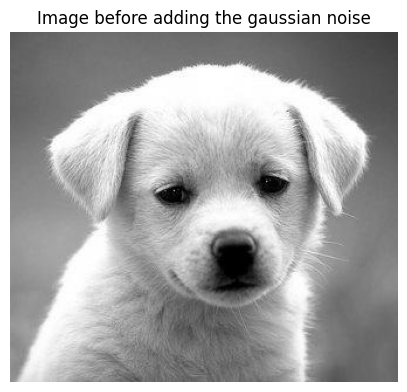

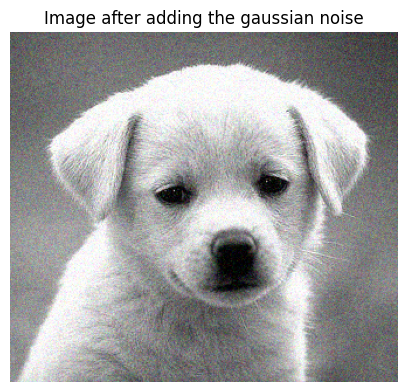

In [43]:
# testing the code above

path = "/content/dog.jpg" # path to the image
add_gaussian_noise(cv.imread(path), 0, 15)